In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import pandas as pd
import os
from glob import glob
from PIL import Image
import cv2
from sklearn.metrics import confusion_matrix
import itertools


import keras
from keras.applications.inception_v3 import InceptionV3
from keras import regularizers
from keras.regularizers import l2
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D
from keras import backend as K
from keras import callbacks
from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import model_from_json
from tensorflow.keras.models import load_model

In [12]:
image_width, image_height = 224, 224
batch_size = 32

training_data_generator = ImageDataGenerator(
    rescale=1./255, #normalization
    shear_range=0.25,
    zoom_range=0.25,
    rotation_range=20,
    width_shift_range=0.25,
    height_shift_range=0.25,
    horizontal_flip=True,
    validation_split=0.2)


train_generator = training_data_generator.flow_from_directory(
        "dataset/train",
        target_size=(image_width, image_height),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')


validation_generator = validation_data_generator.flow_from_directory(
    "dataset/train",
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)


train_samples = len(train_generator.filenames)
num_classes = len(train_generator.class_indices)

Found 2259 images belonging to 13 classes.
Found 0 images belonging to 13 classes.


In [13]:
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(64,activation='relu')(x)


predictions = Dense(num_classes,
                    kernel_regularizer=regularizers.l2(0.005), 
                    activation='softmax')(x)


filepath = "Baru3/Best_-{epoch:03d}-{loss:4f}-{acc:4f}.h5"


checkpointer = ModelCheckpoint(filepath,
                               monitor='loss',
                               verbose=1,
                               save_best_only=True)


reduce_lr = ReduceLROnPlateau(monitor='loss',
                              factor=0.2,
                              patience=5, 
                              min_lr=0.001)


model = Model(inputs=inception.input, outputs=predictions)


model.compile(optimizer=keras.optimizers.sgd(lr=0.01, 
                                             decay=0.0005, 
                                             momentum=0.9, 
                                             nesterov=False), loss='categorical_crossentropy', metrics=['accuracy'])


csv_logger = CSVLogger('Baru3/history_13class.log')
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_377 (Conv2D)             (None, None, None, 3 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_377 (BatchN (None, None, None, 3 96          conv2d_377[0][0]                 
__________________________________________________________________________________________________
activation_377 (Activation)     (None, None, None, 3 0           batch_normalization_377[0][0]    
____________________________________________________________________________________________

In [14]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch = 70,
                    validation_data=validation_generator,
                    validation_steps= 14,
                    epochs=70,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer, reduce_lr])

Epoch 1/70
70/70 [==============================] - 190s 3s/step - loss: 1.6506 - acc: 0.4749

Epoch 00001: loss improved from inf to 1.64544, saving model to Baru3/Best_-001-1.645444-0.476426.h5
Epoch 2/70
70/70 [==============================] - 190s 3s/step - loss: 1.0514 - acc: 0.6906

Epoch 00002: loss improved from 1.64544 to 1.05140, saving model to Baru3/Best_-002-1.051400-0.690625.h5
Epoch 3/70
70/70 [==============================] - 202s 3s/step - loss: 0.8081 - acc: 0.7591

Epoch 00003: loss improved from 1.05140 to 0.80656, saving model to Baru3/Best_-003-0.806565-0.760614.h5
Epoch 4/70
70/70 [==============================] - 198s 3s/step - loss: 0.6971 - acc: 0.7992

Epoch 00004: loss improved from 0.80656 to 0.69577, saving model to Baru3/Best_-004-0.695774-0.800180.h5
Epoch 5/70
70/70 [==============================] - 195s 3s/step - loss: 0.5757 - acc: 0.8473

Epoch 00005: loss improved from 0.69577 to 0.57571, saving model to Baru3/Best_-005-0.575708-0.847321.h5
Epoc

70/70 [==============================] - 183s 3s/step - loss: 0.0488 - acc: 0.9908

Epoch 00047: loss improved from 0.05233 to 0.04859, saving model to Baru3/Best_-047-0.048589-0.990967.h5
Epoch 48/70
70/70 [==============================] - 183s 3s/step - loss: 0.0653 - acc: 0.9871

Epoch 00048: loss did not improve from 0.04859
Epoch 49/70
70/70 [==============================] - 184s 3s/step - loss: 0.0409 - acc: 0.9942

Epoch 00049: loss improved from 0.04859 to 0.04086, saving model to Baru3/Best_-049-0.040865-0.994163.h5
Epoch 50/70
70/70 [==============================] - 181s 3s/step - loss: 0.0394 - acc: 0.9937

Epoch 00050: loss improved from 0.04086 to 0.03951, saving model to Baru3/Best_-050-0.039505-0.993714.h5
Epoch 51/70
70/70 [==============================] - 188s 3s/step - loss: 0.0630 - acc: 0.9859

Epoch 00051: loss did not improve from 0.03951
Epoch 52/70
70/70 [==============================] - 186s 3s/step - loss: 0.0523 - acc: 0.9902

Epoch 00052: loss did not i

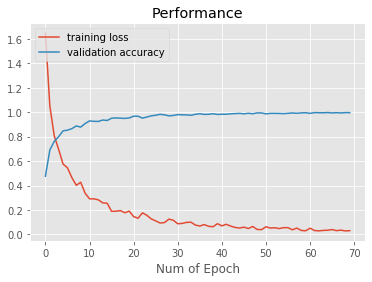

In [15]:
train_loss = history.history['loss']
val_acc = history.history['acc']
xc = range(70)
plt.style.use("ggplot")
plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, val_acc)
plt.xlabel('Num of Epoch')
plt.title('Performance')
plt.grid(True)
plt.legend(['training loss', 'validation accuracy'], loc=2)
plt.show()

In [16]:
class_map_3 = train_generator.class_indices
class_map_3


{'bedroom': 0,
 'coast': 1,
 'forest': 2,
 'highway': 3,
 'insidecity': 4,
 'kitchen': 5,
 'livingroom': 6,
 'mountain': 7,
 'office': 8,
 'opencountry': 9,
 'street': 10,
 'suburb': 11,
 'tallbuilding': 12}

In [25]:
model_best = load_model('Baru3/Best_-063-0.029315-0.995510.h5',compile = False)

In [26]:
#PREDICT CLASSES
test_path = 'dataset/test'

listing = os.listdir(test_path)
picture = []
labeling = []
for file in listing:
    test_image = cv2.imread(test_path + '/' + file)
    test_image = np.array(test_image)
    test_image = test_image.astype('float32')
    test_image /= 255
    test_image = np.expand_dims(test_image, axis=0)
    pred = model_best.predict(test_image)
    index = np.argmax(pred)
    if(index==0):
        name = 'bedroom'
    elif(index==1):
        name = 'coast'
    elif(index==2):
        name = 'forest'
    elif(index==3):
        name = 'highway'
    elif(index==4):
        name = 'insidecity'
    elif(index==5):
        name = 'kitchen'
    elif(index==6):
        name = 'livingroom'
    elif(index==7):
        name = 'mountain'
    elif(index==8):
        name = 'office'
    elif(index==9):
        name = 'opencountry'
    elif(index==10):
        name = 'street'
    elif(index==11):
        name = 'suburb'
    else:
        name = 'tallbuilding'
    filename = os.path.splitext(file)[0]
    picture.append(filename)
    labeling.append(name)

dict = {'id': picture, 'label': labeling}

prediction = pd.DataFrame(dict).to_csv('Baru3/prediction5.csv',index=False)